### Lab Tasks
- In the dataframe creates in Lab 2 - Part a set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale feature set X. 

### Data Preprocessing

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('adult.csv')

In [34]:
data = data[data != ' ?']

In [35]:
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [36]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [37]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [38]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [39]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Salary', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [40]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [41]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

#### Question 1
First train the following models on X_train and y_train. 
- Linear support vector machine with default parameters. 
- decision tree with ``max_depth = 3``
- K neighbors classifier with ``n_neighbors = 5``.

In the all above models, set ``random_sate = 0``.
Compute the test precision score of hard-voting classifier? (two significant digits)

In [42]:
X = data.loc[:, data.columns != 'Salary']
y = data['Salary']
X.info()
X.head()
y.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 25 columns):
age                       32561 non-null int64
fnlwgt                    32561 non-null int64
education-num             32561 non-null int64
sex                       32561 non-null int64
capital-gain              32561 non-null int64
capital-loss              32561 non-null int64
hours-per-week            32561 non-null int64
 Divorced                 32561 non-null uint8
 Married-AF-spouse        32561 non-null uint8
 Married-civ-spouse       32561 non-null uint8
 Married-spouse-absent    32561 non-null uint8
 Never-married            32561 non-null uint8
 Separated                32561 non-null uint8
 Widowed                  32561 non-null uint8
 Husband                  32561 non-null uint8
 Not-in-family            32561 non-null uint8
 Other-relative           32561 non-null uint8
 Own-child                32561 non-null uint8
 Unmarried                32561 non-null uint

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Divorced,Married-AF-spouse,Married-civ-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,1,...,0,0,0,0,1,0,0,1,0,0


0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [44]:
!pip install mglearn

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
#Linear Support Vector Machine
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(random_state = 0).fit(X_train, y_train)
print('Coefficient Shape: ', linear_svm.coef_.shape)
print('Intercept Shape: ', linear_svm.intercept_.shape)
print('Training Set Accuracy: {:.2f}'.format(linear_svm.score(X_train, y_train)))
print('Testing Set Accuracy: {:.2f}'.format(linear_svm.score(X_test, y_test)))


Coefficient Shape:  (1, 25)
Intercept Shape:  (1,)
Training Set Accuracy: 0.84
Testing Set Accuracy: 0.84


In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
dec_tree.fit(X_train, y_train)
print('Training Set Accuracy: {:.2f}'.format(dec_tree.score(X_train, y_train)))
print('Testing Set Accuracy: {:.2f}'.format(dec_tree.score(X_test, y_test)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Training Set Accuracy: 0.84
Testing Set Accuracy: 0.84


In [47]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
training_score_list = []
testing_score_list = []

for k in range(1, 20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    training_score_list.append(knn.score(X_train, y_train))
    testing_score_list.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

Text(0.5,0,'k value')

Text(0,0.5,'Accuracy')

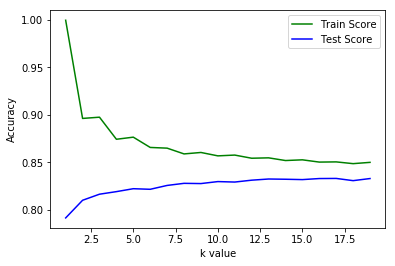

In [48]:
x_axis = range(1, 20)
%matplotlib inline
plt.plot(x_axis, training_score_list, label = 'Train Score', c = 'g')
plt.plot(x_axis, testing_score_list, label = 'Test Score', c = 'b')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()

In [59]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [60]:
from sklearn.ensemble import VotingClassifier
vote_cls = VotingClassifier(estimators = [('LSVM', linear_svm), ('Dec Tree', dec_tree), ('KNN', knn)])
vote_cls.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (linear_svm, dec_tree, knn, vote_cls):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier(estimators=[('LSVM', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)), ('Dec Tree', DecisionTreeClassifier(class_weight=None, criterion=...wski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC 0.8441223436924211


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier 0.8422798182041519


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

KNeighborsClassifier 0.8331900257953568


VotingClassifier(estimators=[('LSVM', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)), ('Dec Tree', DecisionTreeClassifier(class_weight=None, criterion=...wski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

VotingClassifier 0.8478073946689596


C:\Users\srohi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Question 2
First train the following models on X_train and y_train. 
- Support vector machine with kernel 'rbf' and default parameters. 
- Decision tree with ``max_depth = 3``
- Logistic regression with default parameters.

In the all above models, set ``random_sate = 0``.
Compute the test recall score of soft-voting classifier? (two significant digits)

In [61]:
#Support Vector Machine with rbf kernel trick
from sklearn.svm import SVC
rbf_class = SVC(random_state = 0)
rbf_class.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
#Logisitic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0)
log_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
from sklearn.ensemble import VotingClassifier
vote_cls_soft = VotingClassifier(estimators = [('SVM with kernel RBF', rbf_class), ('Dec Tree', dec_tree), ('Logistic', log_model)], voting = 'soft')
vote_cls_soft.fit(X_train, y_train)
#probas = [vote_cls_soft.fit(X_train, y_train).predict_proba(X_train) for c in (rbf_class, dec_tree, log_model, vote_cls_soft)]
#print(probas)

from sklearn.metrics import accuracy_score
for clf in (rbf_class, dec_tree, log_model, vote_cls_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SyntaxError: invalid syntax (<ipython-input-87-11cae3333c22>, line 4)

#### Question 3
Train a bagging classifier on base model logistic regression with default parameters. Set the hyper-parameter as follow: 
```Python
n_estimators = 100
max_samples = 500
max_features = 5
random_state = 0```
What is out of bag score? (two significant digits)

In [52]:
from sklearn.ensemble import BaggingClassifier
log_model_2 = LogisticRegression()
bag_clf = BaggingClassifier(log_model_2, n_estimators = 100, max_samples = 500,
                           max_features = 5, random_state = 0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=5,
         max_samples=500, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7578921508414199


In [54]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=5,
         max_samples=500, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

Train score: 0.76
Test score: 0.76


#### Question 4
Use a grid search to find the best parameters of a random forest machine learning model on this dataset. 
```Python 
max_depth in [1, 3, 5, 7]
max_features in [5, 7, 9]
n_estimators in [100, 200, 500]
random_state = 0
cv = 5```

What are the best parameters of the model? 

In [55]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfor_clf = RandomForestClassifier(n_jobs = -1, random_state = 0)

#Grid Search
from sklearn.grid_search import GridSearchCV
param_grid = {
    'max_depth': [1, 3, 5, 7],
    'max_features': [5, 7, 9],
    'n_estimators': [100, 200, 500]    
}

CV_rfor = GridSearchCV(estimator = rfor_clf, param_grid = param_grid, cv = 5)
CV_rfor.fit(X_train, y_train)
CV_rfor.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7], 'max_features': [5, 7, 9], 'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'max_depth': 7, 'max_features': 9, 'n_estimators': 100}

#### Question 5
Train a random forest machine learning model on this dataset using the best parameters in the previous question. 

Which feature has the highest importance? 

In [56]:
rfor_clf_upt = RandomForestClassifier(n_jobs = -1, max_depth = 7, max_features = 9, n_estimators = 100, random_state = 0)
rfor_clf_upt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
#Feature Importance
feature_importance = pd.DataFrame(rfor_clf_upt.feature_importances_,
                                 index = X_train.columns,
                                 columns = ['importances']).sort_values('importance', ascending = False)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'